In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [3]:
train['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [4]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
label = train['price_range']
data = train.drop(columns='price_range')
# y_train=np.array(y_train)

In [10]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = np.array(data)
label = np.array(label)
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)

# # Applying your custom LDA function
# X_lda_custom = lda(X_train, y_train)  # Ensure your lda function is defined and works correctly
# X_train_lda_custom = X_train.dot(X_lda_custom)

# Applying built-in LDA
lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Training Gaussian Naive Bayes classifier
gnb = NaiveBayes()
gnb.fit(X_train_lda, y_train)

# Predicting the test set results
y_pred = gnb.predict(X_test_lda)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes on LDA-reduced data:", accuracy)

Accuracy of Naive Bayes on LDA-reduced data: 0.9433333333333334


In [7]:
 data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


**The value ranges from -1 to 1**

**1 indicates a perfect positive linear relationship.
-1 indicates a perfect negative linear relationship.
0 indicates no linear relationship.**

In [8]:
def correlation(x,y):
    x = np.array(x)
    y_mean = np.mean(y)
    x_mean = np.mean(x)
    x_diff = x-x_mean
    y_diff = y-y_mean
    sumproduct = np.sum(x_diff * y_diff)
    deno = np.sqrt(np.sum(x_diff**2)*np.sum(y_diff**2))
    return sumproduct/deno

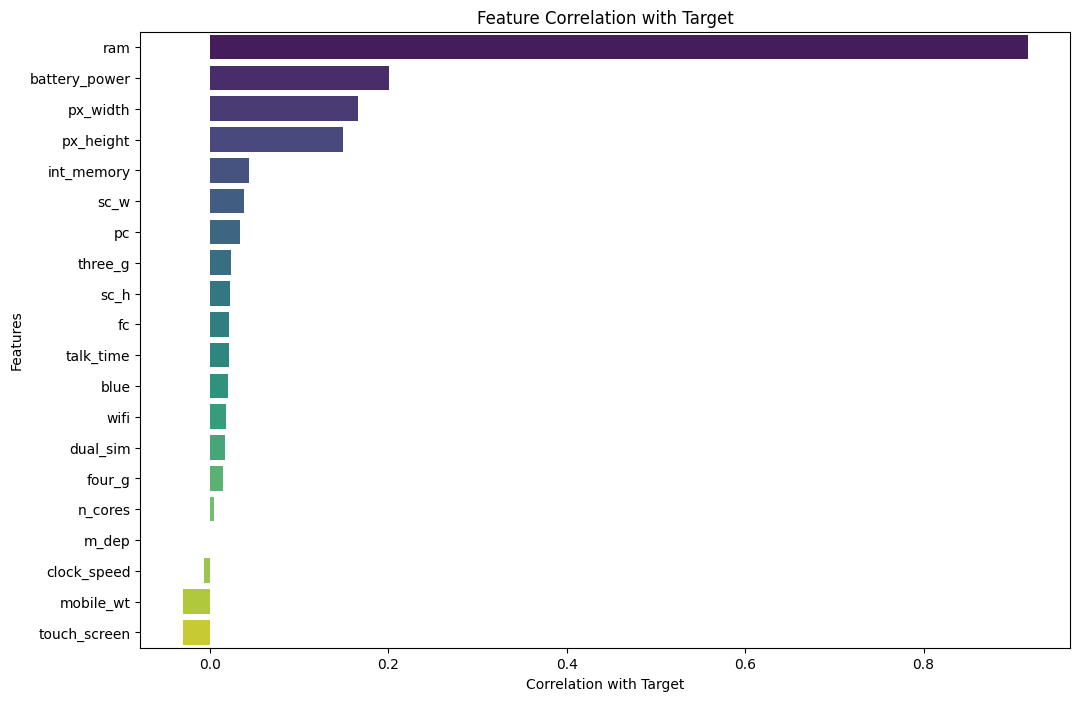

In [9]:
c = []
for i in data:
    #print(i)
    c.append(correlation(data[i],label))

import matplotlib.pyplot as plt
import seaborn as sns  
feature_names = data.columns.tolist()

correlation_df = pd.DataFrame({
    'Feature': feature_names,
    'Correlation': c
})
feature_names = data.columns.tolist()
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='viridis')
plt.xlabel('Correlation with Target')
plt.ylabel('Features')
plt.title('Feature Correlation with Target')
plt.show()

In [10]:
correlations = data.apply(lambda x: x.corr(label))
correlations

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
dtype: float64

In [8]:
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_prior = None
        self.class_conditional = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_prior = np.zeros(len(self.classes))
        self.class_conditional = []

        for i, cls in enumerate(self.classes):
            X_cls = X[y == cls]
            self.class_prior[i] = len(X_cls) / len(X)
            class_conditional_i = []

            for feature in range(X.shape[1]):
                mu = np.mean(X_cls[:, feature])
                # Ensure that standard deviation is not zero to avoid division by zero
                sigma = np.std(X_cls[:, feature])
                if sigma == 0:
                    sigma = 0.01  # A small constant to avoid zero division
                class_conditional_i.append((mu, sigma))
            
            self.class_conditional.append(class_conditional_i)

    def predict(self, X):
        predictions = []

        for x in X:
            probs = []

            for i, cls in enumerate(self.classes):
                prior = self.class_prior[i]
                conditional = self.class_conditional[i]
                class_prob = prior

                for j, (mu, sigma) in enumerate(conditional):
                    class_prob *= self.gaussian_probability(x[j], mu, sigma)
                
                probs.append(class_prob)
            
            predictions.append(self.classes[np.argmax(probs)])
        
        return predictions

    def gaussian_probability(self, x, mu, sigma):
        return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))


In [12]:
from sklearn.model_selection import train_test_split
X = np.array(train.drop(columns='price_range'))
y = np.array(train['price_range'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
from sklearn.metrics import accuracy_score, classification_report


# Initialize Naive Bayes classifier
nb = NaiveBayes()

# Train the classifier
nb.fit(X_train, y_train)

# Make predictions
predictions = nb.predict(X_test)

# Evaluate the model
accuracy_all_features = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy_all_features)
print(classification_report(y_test, predictions))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.74      0.73      0.74       146
           2       0.67      0.72      0.70       148
           3       0.88      0.83      0.86       155

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



In [14]:
train2 = train.drop(columns=['m_dep','n_cores','clock_speed','four_g'])

In [15]:
train2.drop(columns='price_range')

,battery_power,blue,dual_sim,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,0,1,7,188,2,20,756,2549,9,7,19,0,0,1
1,1021,1,1,0,53,136,6,905,1988,2631,17,3,7,1,1,0
2,563,1,1,2,41,145,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,0,0,10,131,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,0,13,44,141,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,2,106,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,1,0,39,187,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,1,1,36,108,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0,4,46,145,5,336,670,869,18,10,19,1,1,1


In [16]:
X2=np.array(train2.drop(columns='price_range'))
y2=np.array(train2['price_range'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)


In [17]:
# Create and train the Gaussian Naive Bayes model
gnb2 = NaiveBayes()
gnb2.fit(X_train2, y_train2)

# Make predictions
y_pred2 = gnb2.predict(X_test2)

accuracy_coll_selection = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy_coll_selection)
print(classification_report(y_test2, y_pred2))

Accuracy: 0.805
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       151
           1       0.75      0.73      0.74       146
           2       0.68      0.74      0.71       148
           3       0.88      0.84      0.86       155

    accuracy                           0.81       600
   macro avg       0.81      0.80      0.81       600
weighted avg       0.81      0.81      0.81       600



In [18]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [19]:
X_reduced = PCA(data.iloc[:,:],3)

In [20]:
X_reduced

array([[  430.5970944 ,   795.78823104,  -390.07033138],
       [  504.9847354 ,  -696.62236757,  -235.62908147],
       [  473.32982793,  -763.94213631,  -680.0594664 ],
       ...,
       [  930.66926575,  -436.67145174,   664.29621094],
       [-1252.73761513,   629.8841122 ,   285.7863917 ],
       [ 1796.08152123,   455.98743531,  -714.50625918]])

In [21]:
X_PCA = X_reduced
y_PCA = np.array(train['price_range'])
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.3, random_state=42)

In [22]:
X_test_PCA.shape

(600, 3)

In [23]:
X_train_PCA.shape

(1400, 3)

In [24]:
# Assuming X_train_PCA and y_train_PCA are properly defined and valid
nb = NaiveBayes()
nb.fit(X_train_PCA, y_train_PCA)
predictions_PCA = nb.predict(X_test_PCA)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy_PCA = accuracy_score(y_test_PCA, predictions_PCA)
print("Accuracy:", accuracy_PCA)
print(classification_report(y_test_PCA, predictions_PCA))

Accuracy: 0.795
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       151
           1       0.74      0.72      0.73       146
           2       0.66      0.72      0.69       148
           3       0.87      0.83      0.85       155

    accuracy                           0.80       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.80      0.80       600



In [25]:
def lda(X, y):
    # Step 1: Calculate the mean vectors for each class
    class_labels = np.unique(y)
    mean_vectors = []
    for cl in class_labels:
        mean_vectors.append(np.mean(X[y == cl], axis=0))
    
    # Step 2: Compute scatter matrices
    # Within-class scatter matrix (SW)
    S_W = np.zeros((X.shape[1], X.shape[1]))
    for cl, mv in zip(class_labels, mean_vectors):
        class_sc_mat = np.zeros((X.shape[1], X.shape[1]))  # scatter matrix for every class
        for row in X[y == cl]:
            row, mv = row.reshape(X.shape[1], 1), mv.reshape(X.shape[1], 1)
            class_sc_mat += (row-mv).dot((row-mv).T)
        S_W += class_sc_mat

    # Overall mean
    overall_mean = np.mean(X, axis=0)
    
    # Between-class scatter matrix (SB)
    S_B = np.zeros((X.shape[1], X.shape[1]))
    for i, mean_vec in enumerate(mean_vectors):
        n = X[y == class_labels[i], :].shape[0]
        mean_vec = mean_vec.reshape(X.shape[1], 1)
        overall_mean = overall_mean.reshape(X.shape[1], 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

    # Step 3: Solve the generalized eigenvalue problem for SW^-1 * SB
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    
    # Step 4: Select the eigenvectors with the highest eigenvalues
    # Indexes of the sorted eigenvalues
    eig_val_index = np.argsort(eig_vals)[::-1]
    eig_vecs = eig_vecs[:, eig_val_index]
    top_k_vecs = eig_vecs[:, :len(class_labels)-1]  # Top k vectors, k = number of classes - 1

    return top_k_vecs
X_lda = lda(X, y)
X_train_lda = X_train.dot(X_lda) 
X_train_lda

array([[102.95632843+0.j,  -2.59071541+0.j,  -0.69633734+0.j],
       [ 90.39603042+0.j,  -1.49174093+0.j,  -0.40569854+0.j],
       [ 90.12347051+0.j,  -1.07243944+0.j,   0.86525546+0.j],
       ...,
       [ 79.92608216+0.j,  -1.80603232+0.j,  -0.13319732+0.j],
       [ 98.10773817+0.j,  -1.60822374+0.j,  -0.20119285+0.j],
       [ 62.54975719+0.j,  -1.4149214 +0.j,  -0.89618373+0.j]])

In [26]:
y_LDA = np.array(y_train)  # Ensure y_train is the same used to compute LDA

# Split the data into training and testing sets
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X_train_lda, y_LDA, test_size=0.3, random_state=42)
# Initialize Naive Bayes classifier
nb_LDA = NaiveBayes()

# Train the classifier
nb_LDA.fit(X_train_LDA, y_train_LDA)

# Make predictions
predictions_LDA = nb_LDA.predict(X_test_LDA)

# Evaluate the model
accuracy_LDA = accuracy_score(y_test_LDA, predictions_LDA)
print("Accuracy:", accuracy_LDA)
print(classification_report(y_test_LDA, predictions_LDA))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.91      0.94      0.93       102
           2       0.93      0.90      0.92       105
           3       0.98      0.96      0.97       107

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420



In [27]:
# Convert the numpy array to a pandas DataFrame
X_train_lda_df = pd.DataFrame(X_train_lda)

# Calculate the correlation between each LDA component and the target variable
correlations_LDA = X_train_lda_df.apply(lambda x: x.corr(pd.Series(y_LDA)))

# Display the correlations
print(correlations_LDA)

0    0.958228
1    0.004526
2   -0.003350
dtype: float64


/opt/conda/lib/python3.10/site-packages/pandas/core/base.py:662: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.asarray(values, dtype=dtype)


In [28]:
import numpy as np

class Particle:
    def __init__(self, n_features):
        self.position = np.random.choice([0, 1], size=n_features)  # Random initialization of features
        self.velocity = np.random.rand(n_features)  # Random velocity
        self.best_position = np.copy(self.position)
        self.best_score = -np.inf

    def update_velocity(self, global_best_position, w=0.5, c1=0.8, c2=0.9):
        r1, r2 = np.random.rand(2)  # Random coefficients
        self.velocity = (w * self.velocity + 
                         c1 * r1 * (self.best_position - self.position) + 
                         c2 * r2 * (global_best_position - self.position))

    def update_position(self):
        self.position = np.where(np.random.rand(self.position.size) < self.sigmoid(self.velocity), 1, 0)

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

def pso_feature_selection(X, y, n_particles=30, max_iter=100):
    n_features = X.shape[1]
    particles = [Particle(n_features) for _ in range(n_particles)]
    global_best_position = None
    global_best_score = -np.inf

    for _ in range(max_iter):
        for particle in particles:
            # Subset features according to the particle's position
            subset_features = X[:, particle.position == 1]

            # Evaluate particle's position using your custom NaiveBayes
            if np.sum(particle.position) > 0:
                score = evaluate_naive_bayes(subset_features, y)  # Implement this function based on your NaiveBayes
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = np.copy(particle.position)
                if score > global_best_score:
                    global_best_score = score
                    global_best_position = np.copy(particle.position)

        # Update velocity and position of particles
        for particle in particles:
            particle.update_velocity(global_best_position)
            particle.update_position()

    return global_best_position, global_best_score

def evaluate_naive_bayes(X, y):
    """Simple train-test split evaluation for NaiveBayes model."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = NaiveBayes()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Calculate accuracy or another performance metric
    accuracy = np.mean(predictions == y_test)
    return accuracy
# Example usage:
# X and y are your features and labels
best_features, best_score = pso_feature_selection(X, y)
print("Best feature set:", best_features)
print("Best score:", best_score)


Best feature set: [1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0]
Best score: 0.8183333333333334


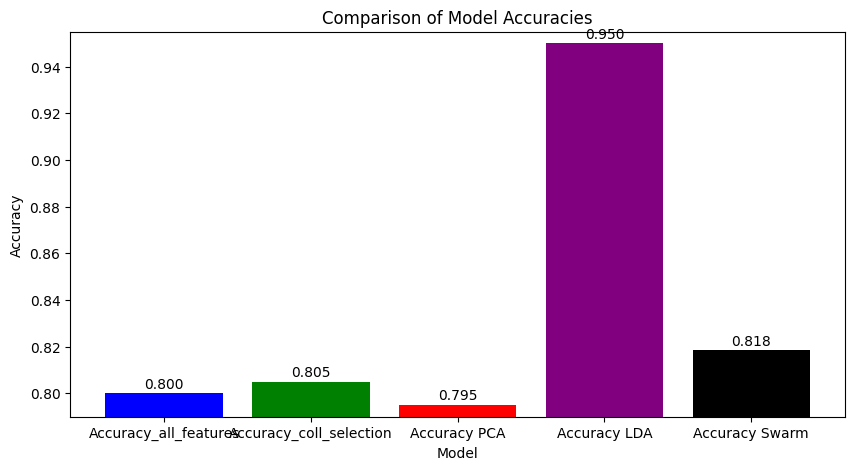

In [29]:
import matplotlib.pyplot as plt


# Labels for the bars
labels = ['Accuracy_all_features', 'Accuracy_coll_selection', 'Accuracy PCA', 'Accuracy LDA', 'Accuracy Swarm']

# Values corresponding to each label
values = [accuracy_all_features, accuracy_coll_selection, accuracy_PCA, accuracy_LDA , best_score]

# Create a bar chart
plt.figure(figsize=(10, 5))  # Size of the figure
plt.bar(labels, values, color=['blue', 'green', 'red', 'purple','black'])

# Setting the y-axis limits to zoom in on differences
# Here we assume the smallest accuracy is 0.94 and the largest is 0.96
# Adjusting to a tighter range around these values
plt.ylim(min(values) - 0.005, max(values) + 0.005)  # Tighten the y-axis to zoom in on differences

# Adding a title and labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Adding value labels on top of each bar
for i in range(len(values)):
    plt.text(i, values[i] + 0.001, f'{values[i]:.3f}', ha = 'center', va = 'bottom')

# Show the plot
plt.show()